<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-09-07 15:52:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  67.1MB/s    in 2.3s    

2025-09-07 15:52:30 (67.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



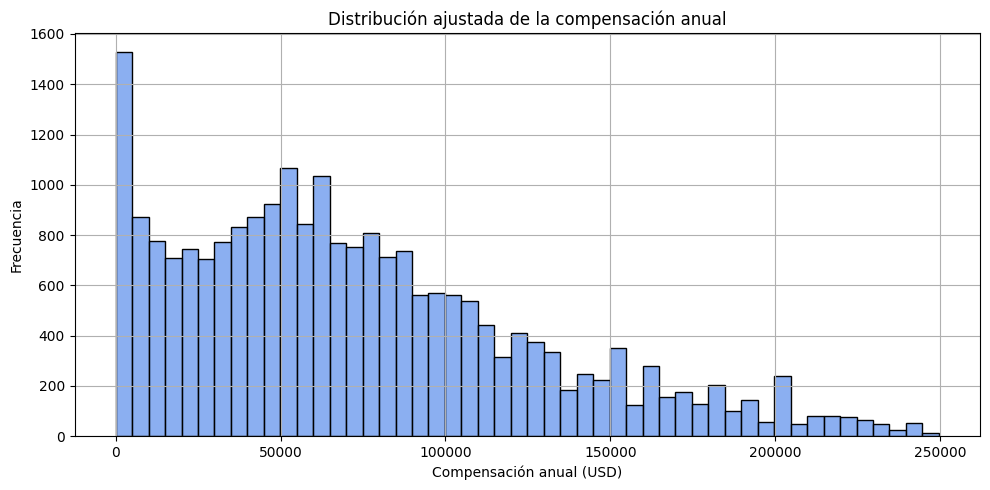

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")


# Filtrar valores extremos: compensaciones menores a $250,000
df_filtered = df[df["ConvertedCompYearly"] < 250000]

# Crear histograma con más bins
plt.figure(figsize=(10,5))
sns.histplot(df_filtered["ConvertedCompYearly"], bins=50, kde=False, color="cornflowerblue")
plt.title("Distribución ajustada de la compensación anual")
plt.xlabel("Compensación anual (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()



In [6]:
!pip install seaborn


In [7]:
import seaborn as sns


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



/tmp/ipykernel_583/3062633834.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["AgeNumeric"] = df_filtered["Age"].apply(convert_age)


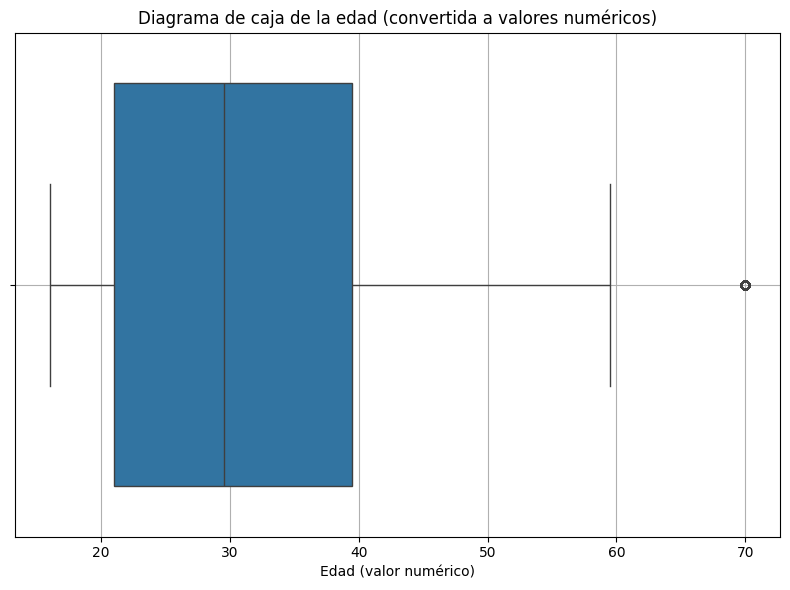

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Eliminar valores nulos y "Prefer not to say"
df_filtered = df[df["Age"].notna() & (df["Age"] != "Prefer not to say")]

# Función para convertir rangos de edad a valores numéricos
def convert_age(age_range):
    mapping = {
        "Under 18 years old": 16,
        "18-24 years old": 21,
        "25-34 years old": 29.5,
        "35-44 years old": 39.5,
        "45-54 years old": 49.5,
        "55-64 years old": 59.5,
        "65 years or older": 70
    }
    return mapping.get(age_range, None)

# Aplicar la conversión
df_filtered["AgeNumeric"] = df_filtered["Age"].apply(convert_age)

# Crear el diagrama de caja
plt.figure(figsize=(8,6))
sns.boxplot(x=df_filtered["AgeNumeric"])
plt.title("Diagrama de caja de la edad (convertida a valores numéricos)")
plt.xlabel("Edad (valor numérico)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



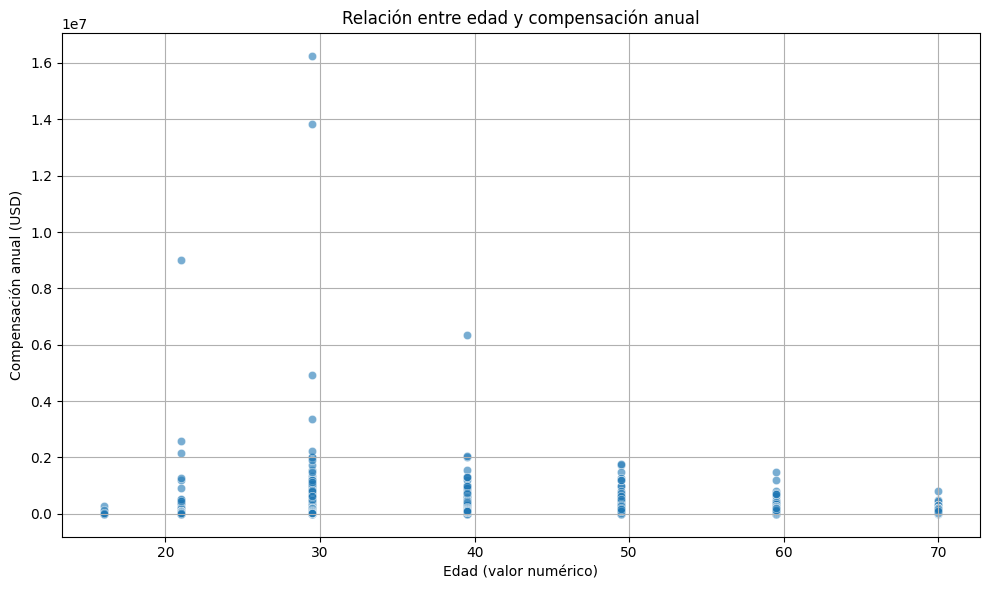

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Eliminar valores nulos y "Prefer not to say"
df_filtered = df[df["Age"].notna() & df["ConvertedCompYearly"].notna()]
df_filtered = df_filtered[df_filtered["Age"] != "Prefer not to say"]

# Convertir rangos de edad a valores numéricos
def convert_age(age_range):
    mapping = {
        "Under 18 years old": 16,
        "18-24 years old": 21,
        "25-34 years old": 29.5,
        "35-44 years old": 39.5,
        "45-54 years old": 49.5,
        "55-64 years old": 59.5,
        "65 years or older": 70
    }
    return mapping.get(age_range, None)

df_filtered["Age_numeric"] = df_filtered["Age"].apply(convert_age)

# Crear gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age_numeric", y="ConvertedCompYearly", data=df_filtered, alpha=0.6)
plt.title("Relación entre edad y compensación anual")
plt.xlabel("Edad (valor numérico)")
plt.ylabel("Compensación anual (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


/tmp/ipykernel_583/951307781.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Age_numeric"] = df_filtered["Age"].apply(convert_age)


Text(0.5, 1.0, 'Relación entre compensación y satisfacción laboral (tamaño según edad)')

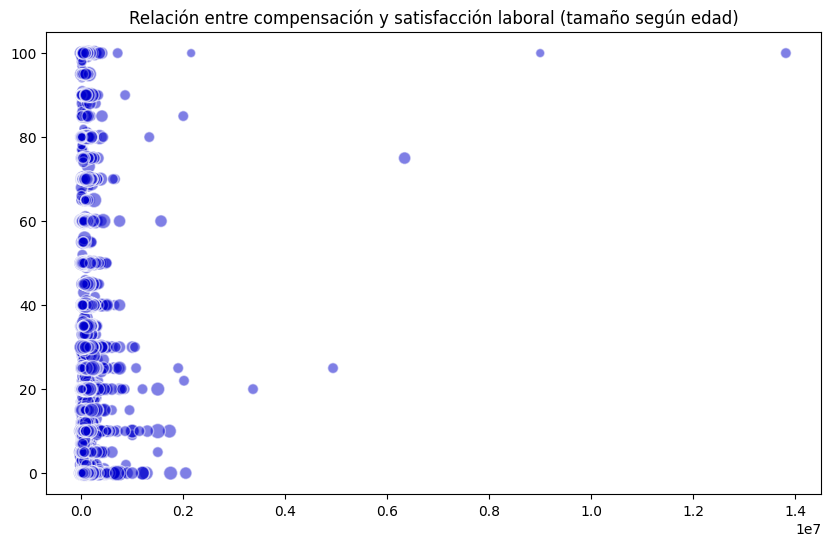

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Eliminar valores nulos y "Prefer not to say"
df_filtered = df[
    df["ConvertedCompYearly"].notna() &
    df["JobSatPoints_6"].notna() &
    df["Age"].notna() &
    (df["Age"] != "Prefer not to say")
]

# Convertir rangos de edad a valores numéricos
def convert_age(age_range):
    mapping = {
        "Under 18 years old": 16,
        "18-24 years old": 21,
        "25-34 years old": 29.5,
        "35-44 years old": 39.5,
        "45-54 years old": 49.5,
        "55-64 years old": 59.5,
        "65 years or older": 70
    }
    return mapping.get(age_range, None)

df_filtered["Age_numeric"] = df_filtered["Age"].apply(convert_age)

# Crear gráfico de burbujas
plt.figure(figsize=(10,6))
plt.scatter(
    x=df_filtered["ConvertedCompYearly"],
    y=df_filtered["JobSatPoints_6"],
    s=df_filtered["Age_numeric"] * 2,  # tamaño de burbuja proporcional a la edad
    alpha=0.5,
    c="mediumblue",
    edgecolors="w"
)
plt.title("Relación entre compensación y satisfacción laboral (tamaño según edad)")


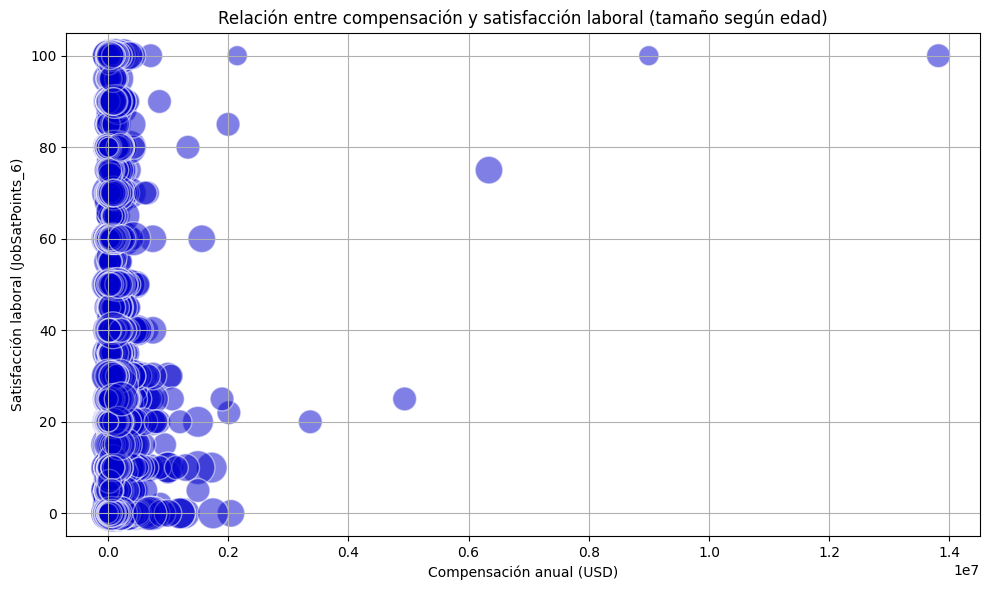

In [14]:
plt.figure(figsize=(10,6))

# Escalar el tamaño de las burbujas multiplicando por un factor mayor
bubble_sizes = df_filtered["Age_numeric"] * 10  # Puedes probar con 15, 20, etc.

plt.scatter(
    x=df_filtered["ConvertedCompYearly"],
    y=df_filtered["JobSatPoints_6"],
    s=bubble_sizes,
    alpha=0.5,
    c="mediumblue",
    edgecolors="w"
)

plt.title("Relación entre compensación y satisfacción laboral (tamaño según edad)")
plt.xlabel("Compensación anual (USD)")
plt.ylabel("Satisfacción laboral (JobSatPoints_6)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



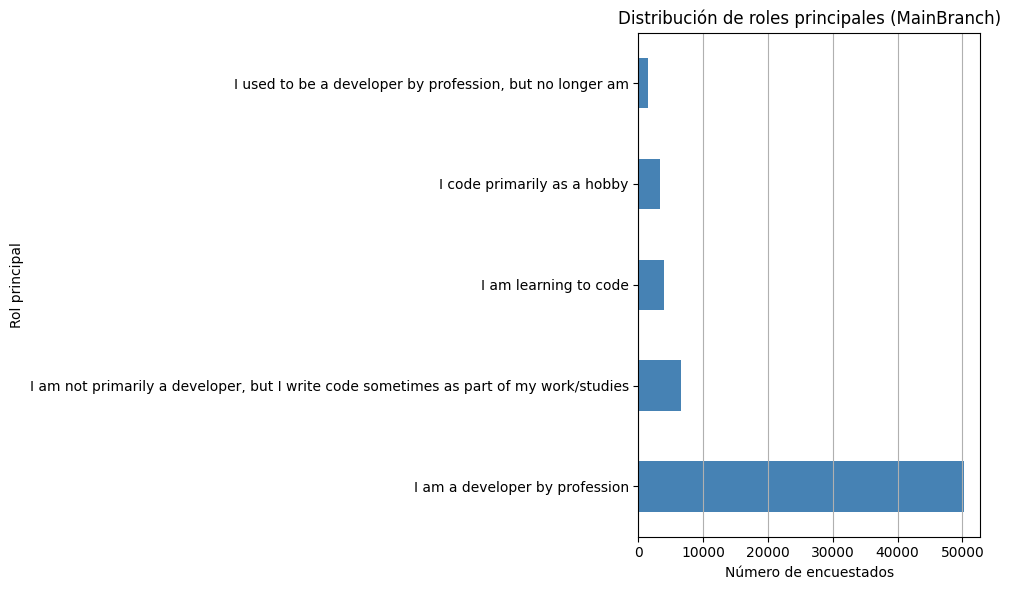

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Eliminar valores nulos en la columna MainBranch
df_filtered = df[df["MainBranch"].notna()]

# Contar la frecuencia de cada rol principal
mainbranch_counts = df_filtered["MainBranch"].value_counts()

# Crear gráfico de barras horizontal
plt.figure(figsize=(10,6))
mainbranch_counts.plot(kind="barh", color="steelblue")
plt.title("Distribución de roles principales (MainBranch)")
plt.xlabel("Número de encuestados")
plt.ylabel("Rol principal")
plt.tight_layout()
plt.grid(axis="x")
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



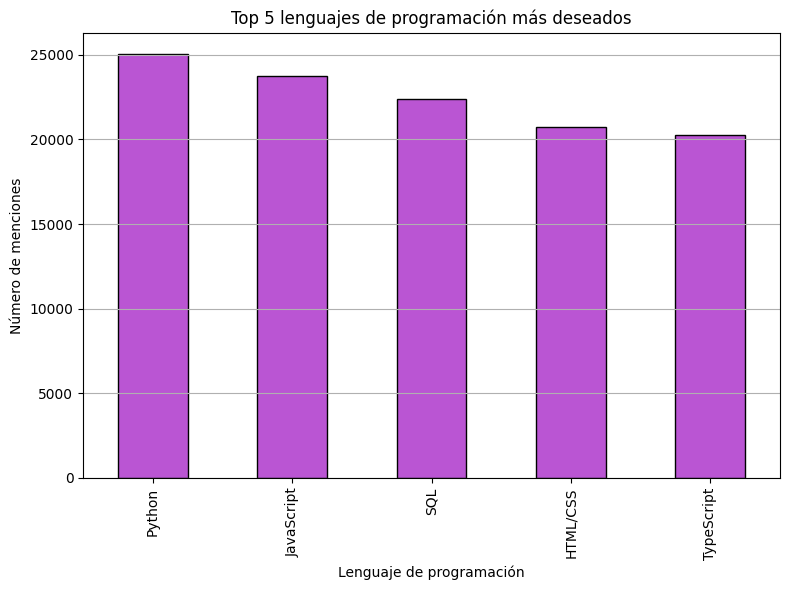

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Eliminar valores nulos en la columna LanguageWantToWorkWith
df_filtered = df[df["LanguageWantToWorkWith"].notna()]

# Separar los lenguajes por punto y coma y aplanar la lista
all_languages = df_filtered["LanguageWantToWorkWith"].str.split(";").explode()

# Contar frecuencia de cada lenguaje
language_counts = all_languages.value_counts().head(5)

# Crear gráfico de barras vertical
plt.figure(figsize=(8,6))
language_counts.plot(kind="bar", color="mediumorchid", edgecolor="black")
plt.title("Top 5 lenguajes de programación más deseados")
plt.xlabel("Lenguaje de programación")
plt.ylabel("Número de menciones")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old')])

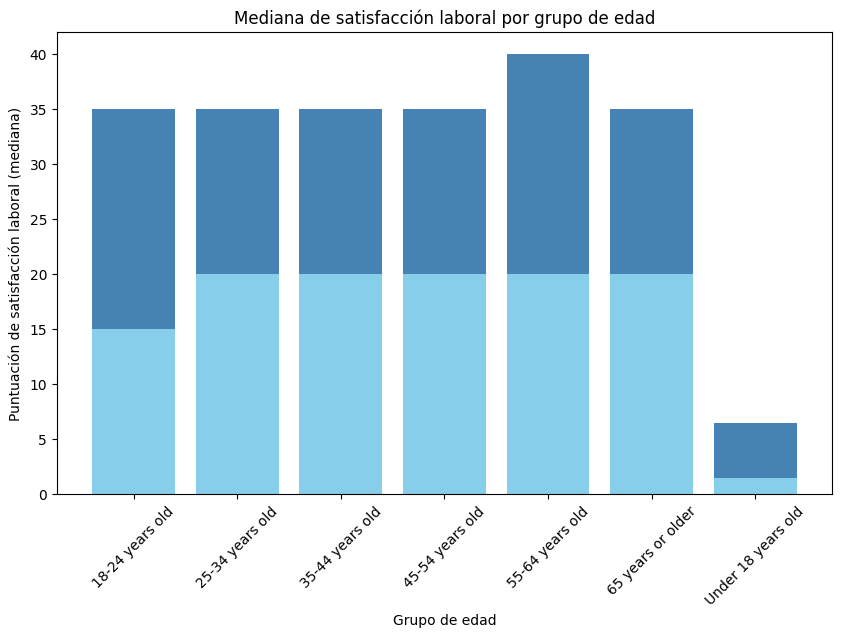

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Filtrar datos válidos
df_filtered = df[
    df["Age"].notna() &
    (df["Age"] != "Prefer not to say") &
    df["JobSatPoints_6"].notna() &
    df["JobSatPoints_7"].notna()
]

# Agrupar por grupo de edad y calcular la mediana de ambas métricas
grouped = df_filtered.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Crear gráfico de barras apiladas
plt.figure(figsize=(10,6))
plt.bar(grouped.index, grouped["JobSatPoints_6"], label="JobSatPoints_6", color="skyblue")
plt.bar(grouped.index, grouped["JobSatPoints_7"], bottom=grouped["JobSatPoints_6"], label="JobSatPoints_7", color="steelblue")

plt.title("Mediana de satisfacción laboral por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Puntuación de satisfacción laboral (mediana)")
plt.xticks(rotation=45)


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



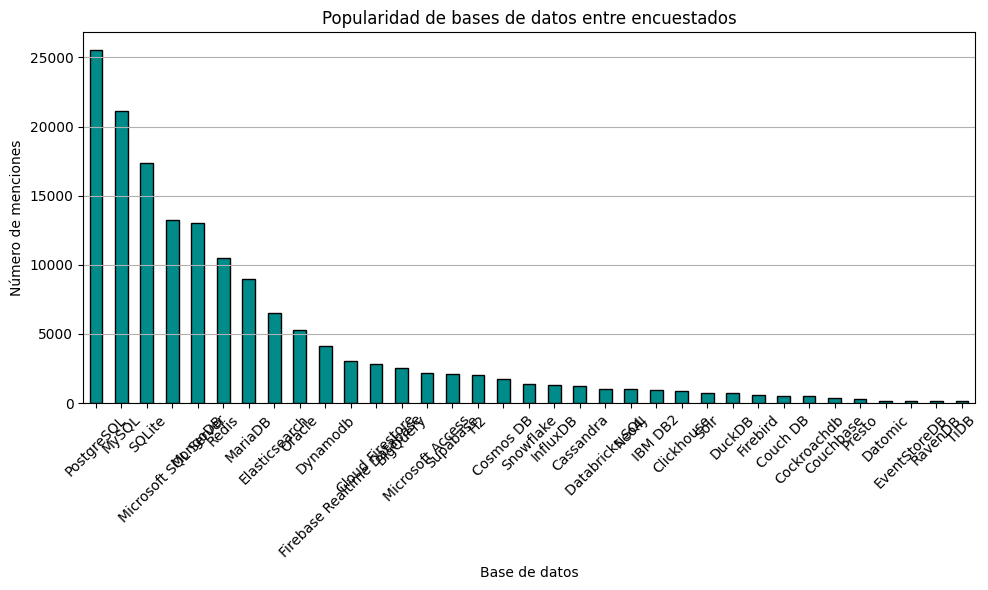

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Eliminar valores nulos en la columna DatabaseHaveWorkedWith
df_filtered = df[df["DatabaseHaveWorkedWith"].notna()]

# Separar los nombres de bases de datos y aplanar la lista
all_databases = df_filtered["DatabaseHaveWorkedWith"].str.split(";").explode()

# Contar frecuencia de cada base de datos
database_counts = all_databases.value_counts()

# Crear gráfico de barras vertical
plt.figure(figsize=(10,6))
database_counts.plot(kind="bar", color="darkcyan", edgecolor="black")
plt.title("Popularidad de bases de datos entre encuestados")
plt.xlabel("Base de datos")
plt.ylabel("Número de menciones")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
